## TASK 1

First, let's import the necessary packages. I used the "matheducators.stackexchange.com" data.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os.path

And let's load the data.

In [2]:
current_dir = os.getcwd()
path = os.path.join(current_dir, "Posts.xml")
posts = pd.read_xml(path, parser="etree")

Firstly, let's make a histogram based on score of the posts. Observe, that the scores can be negative. We also add kernel density estimation line in order to make it more smooth. 

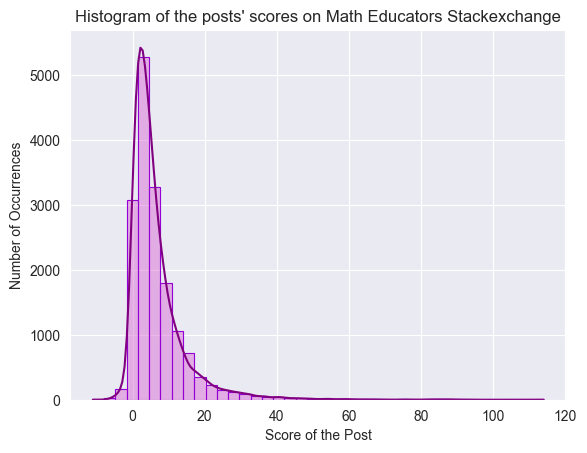

In [3]:
histogram = sns.histplot(posts.Score,
                         bins=40,
                         color="orchid",
                         edgecolor="darkviolet",
                         kde=True,
                         orientation="horizontal")
histogram.lines[0].set_color("purple")
plt.title("Histogram of the posts' scores on Math Educators Stackexchange")
plt.xlabel("Score of the Post")
plt.ylabel("Number of Occurrences")
plt.show()

Secondly, let's draw a box-and-whiskers plot based on the view count of the posts. This time I used a logarithmic scale of the view count in order for the plot to be more readable.

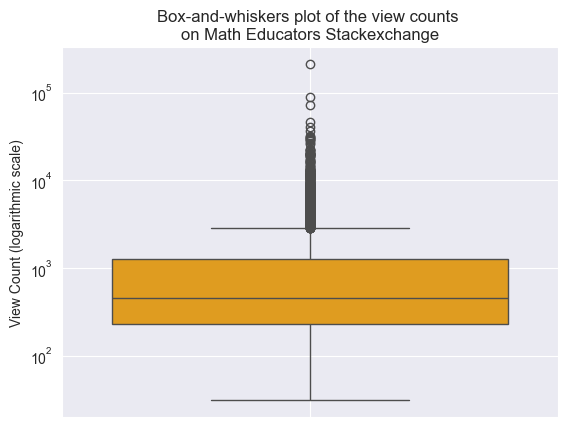

In [4]:
box_whiskers = sns.boxplot(posts.ViewCount, color="orange")
plt.yscale("log")
plt.title("Box-and-whiskers plot of the view counts \non Math Educators Stackexchange")
plt.ylabel("View Count (logarithmic scale)")
plt.grid(True)
plt.show()

Thirdly, let's consider a bar chart based on the number of posts made on specified year.

Year
2014    3929
2015    1983
2016    1352
2017    1360
2018    1391
Name: count, dtype: int64


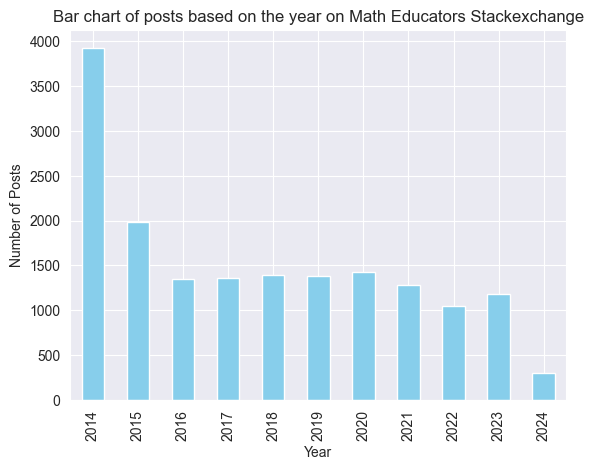

In [5]:
posts["CreationDate"] = pd.to_datetime(posts["CreationDate"])
posts["Year"] = posts["CreationDate"].dt.year
year_counts = posts["Year"].value_counts().sort_index()
print(year_counts.head())

year_counts.plot(kind="bar", color="skyblue")
plt.xlabel("Year")
plt.ylabel("Number of Posts")
plt.title("Bar chart of posts based on the year on Math Educators Stackexchange")
plt.show()

The fourth chart will be a heatmap. We will check how many there were questions and answers within the posts, regarding the year it was created.

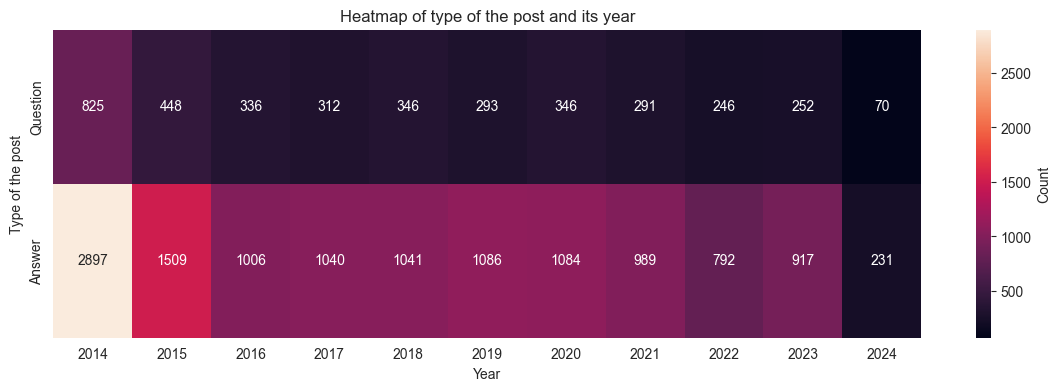

In [7]:
heatmap_data = posts.groupby(['PostTypeId', 'Year']).size().unstack(fill_value=0)
heatmap_data = heatmap_data.head(2)
heatmap_data.rename(index={1: "Question", 2: "Answer"}, inplace=True)

plt.figure(figsize=(14, 4))
sns.heatmap(heatmap_data, annot=True, fmt='d', cbar_kws={'label': 'Count'})
plt.title("Heatmap of type of the post and its year")
plt.xlabel("Year")
plt.ylabel("Type of the post")
plt.show()

Lastly, let's consider a line chart in which we will consider the number of posts made based on the month.

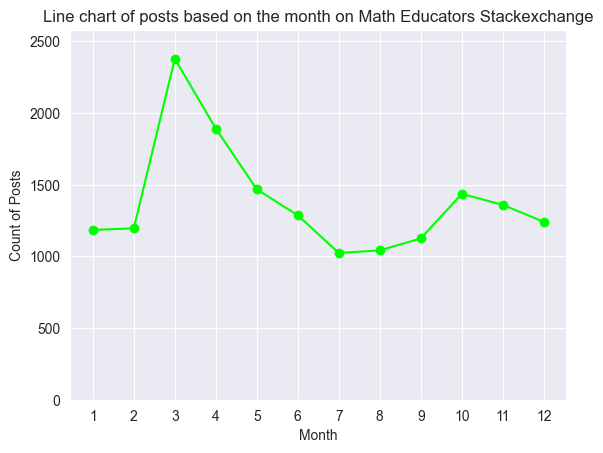

In [12]:
posts["Month"] = posts["CreationDate"].dt.month
month_counts = posts["Month"].value_counts().sort_index()
month_counts.plot(kind="line", marker="o", color="lime")

plt.xlabel("Month")
plt.ylabel("Count of Posts")
plt.title("Line chart of posts based on the month on Math Educators Stackexchange")
plt.xticks(range(1, 13))
plt.grid(True)
plt.ylim(0, month_counts.max() + 200)
plt.show()

## TASK 2

#### The query provided by me to ChatGPT was:

_Suppose that there is some data from stackexchange math tutoring forum. We know that one of the columns is a "ViewCount" column, which shows how many time the site was visited. Some of the records are missing and your task is also to remove them and then create a histogram. Propose an elegant histogram in Python (using matplotlib or seaborn) with good scaling. I would say, that the non-null records are mostly numbers between 100 and 20000. Make it as clear to read as possible. Give a suitable title and name the axis._

_The data is provided in the following way:_
_posts = pd.read_xml(path, parser="etree")_

_If necessary/possible, name the histogram figure "histogram_chatgpt"._



#### The ChatGPT gave the following output:

_To create a histogram that meets your requirements, we'll take the following steps in Python:_

_Filter out null values from the ViewCount column._
_Create a histogram using the matplotlib or seaborn library with clear scaling, a title, and labeled axes._
_Ensure the histogram is well-scaled, with appropriate bin widths to provide a clear view of the distribution._
*Save the figure with the name histogram_chatgpt.*
_Let's go through the Python code to accomplish this:_

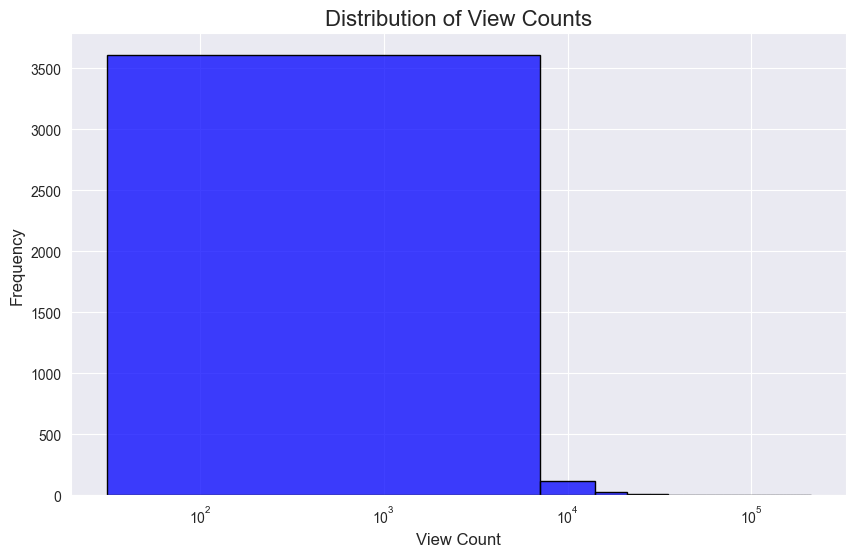

In [13]:
# Filter out the missing 'ViewCount' records
view_counts = posts['ViewCount'].dropna()

# Set up the plot using Seaborn (optional: you can use matplotlib directly if preferred)
plt.figure(figsize=(10, 6))
sns.histplot(view_counts, bins=30, kde=False, color='blue', edgecolor='black')

# Set the title and axis labels
plt.title('Distribution of View Counts', fontsize=16)
plt.xlabel('View Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Set axis scaling for better clarity
plt.xscale('log')  # Log scale to handle wide range
plt.yscale('linear')  # Default scale for the y-axis

# Save the figure with the specified name
plt.savefig('histogram_chatgpt.png')

# Show the plot
plt.show()

_Key Details:_
_Logarithmic scaling on the x-axis: This is useful since the data spans a wide range of values from 100 to 20,000, so a logarithmic scale helps to better visualize the distribution of view counts._
_Color and styling: The histogram has a blue color with black edges to make it easier to read._
_Bin size: The number of bins is set to 30 to balance the level of detail and generalization in the data's distribution._
_This approach should give you a clear, well-scaled histogram that visualizes the distribution of ViewCount values._

#### Well...

...let's just say that I am surprised.

The diagram would probably be better without a logarithmic scaling. We see that there are a lot more posts with view counts less than 1000 (and similarly, that there are not many posts with view counts greater than 1000). We don't know the distribution of the view counts in range 100-1000. The diagram isn't pleasing to an eye. 

#### Let's try one more time.

I removed the sentence where it said that the numbers are mostly between 100 and 20000.

C:\Rtemp\ipykernel_21520\86336785.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  posts_clean['ViewCount'] = posts_clean['ViewCount'].astype(int)


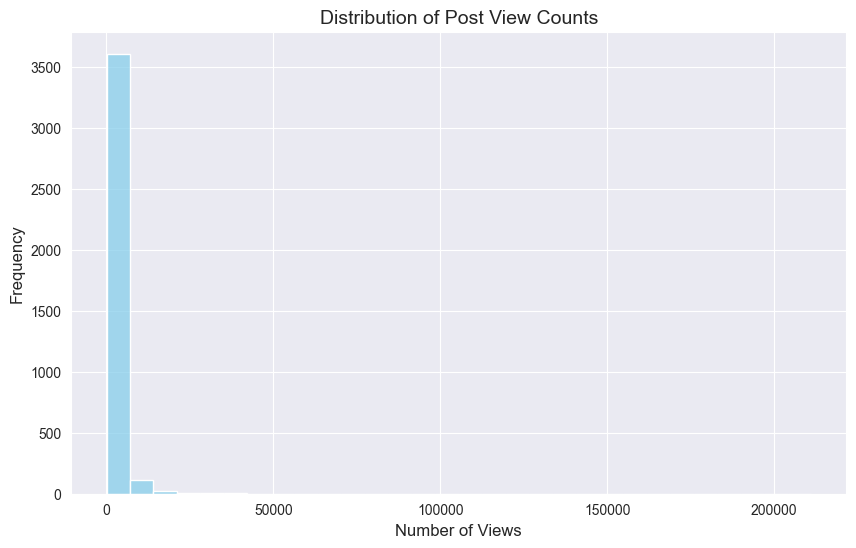

In [14]:
# Clean the data by removing rows where 'ViewCount' is missing or NaN
posts_clean = posts.dropna(subset=['ViewCount'])

# Convert 'ViewCount' to integer (if necessary)
posts_clean['ViewCount'] = posts_clean['ViewCount'].astype(int)

# Create the histogram with Seaborn or Matplotlib
plt.figure(figsize=(10, 6))
sns.histplot(posts_clean['ViewCount'], bins=30, kde=False, color='skyblue')

# Set the title and axis labels
plt.title("Distribution of Post View Counts", fontsize=14)
plt.xlabel("Number of Views", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# Add grid for better readability
plt.grid(True)

# Name the figure
plt.savefig("histogram_chatgpt.png")  # Save the figure
plt.show()

Here we can see that the diagram would be better if there was more impact on the low-value view counts of posts.

Thinking about it after a while, maybe the data provided is not suited for the histogram diagram. There are a few extreme outliers and therefore neither the logarithmic scale, nor the regular scaling seems to be appropriate. One way of dealing with this could be ignoring the outliers.

Also, there is a warning message, but it seems that is not that important.

## TASK 3

We use the code provided on the Teams in .r file in order to export the data. The easiest way to compare the efficiency of different algorithms will be to consider a heatmap.

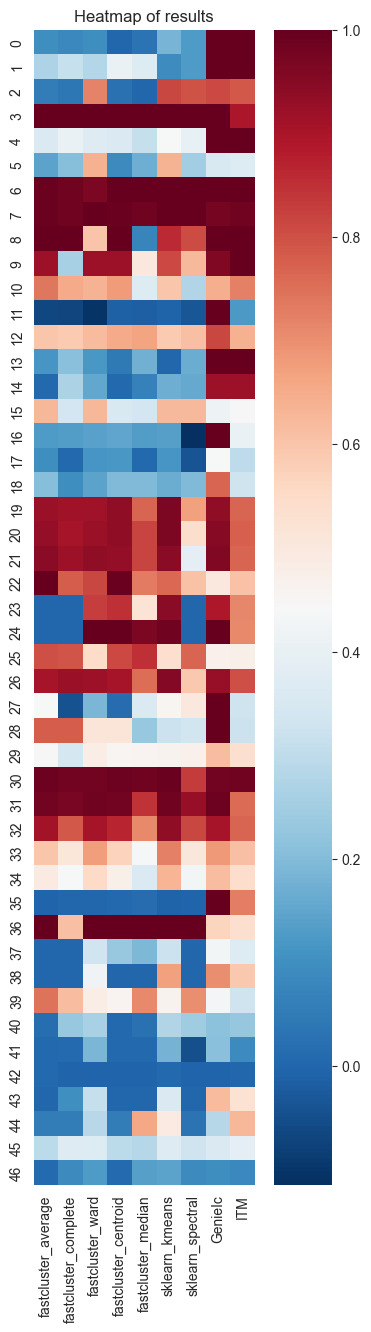

In [19]:
alg = pd.read_csv("alg_results.csv")

plt.figure(figsize=(5, 15))
sns.heatmap(alg, 
            cmap="RdBu_r",
            cbar=True,
            square=True,
            xticklabels=True,
            yticklabels=True)
plt.title("Heatmap of results")
plt.show()

We can tell that the best algorithm is Genielc.